In [1]:
# Imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Constants
EBIBLE_REPO_DIR = '/mnt/data/share/ebible'
LICENCES_FILEPATH = f'{EBIBLE_REPO_DIR}/metadata/licences.tsv'

In [3]:
# Load-in the extracted licenses.tsv file
licenses_df = pd.read_csv(LICENCES_FILEPATH, dtype=str)
licenses_df

,ID,Language,Dialect,Licence Type,Licence Version,CC Licence Link,Copyright Holder,Copyright Years,Translation by
0,aai,Miniafia,NaN,by-nc-nd,4.0,http://creativecommons.org/licenses/by-nc-nd/4.0/,NaN,NaN,Translation by: anonymous
1,aak,Angave (Ankave),NaN,by-nc-nd,4.0,http://creativecommons.org/licenses/by-nc-nd/4.0/,"Wycliffe Bible Translators, Inc.",copyright © 1990,Translation by: Wycliffe Bible Translators
2,aau,Abau,NaN,by-nc-nd,4.0,http://creativecommons.org/licenses/by-nc-nd/4.0/,"Wycliffe Bible Translators, Inc.",copyright © 2006,Translation by: Wycliffe Bible Translators
3,aaz,Amarasi,NaN,by-nd,4.0,http://creativecommons.org/licenses/by-nd/4.0/,"Unit Bahasa dan Budaya, Kupang NTT, Indonesia",copyright © 1999-2014,Translation by: Wycliffe Bible Translators
4,abp,"Ayta, Abellen",NaN,NaN,NaN,NaN,"Wycliffe Bible Translators, Inc.",copyright © 2020,NaN
...,...,...,...,...,...,...,...,...,...
1272,zpzNTpp,"Zapotec, Texmelucan",NaN,by-nc-nd,4.0,http://creativecommons.org/licenses/by-nc-nd/4.0/,"Wycliffe Bible Translators, Inc.",copyright © 2004,"Translation by: Wycliffe Bible Translators, Inc."
1273,zsrNT,"Zapotec, Southern Rincon",NaN,by-nc-nd,4.0,http://creativecommons.org/licenses/by-nc-nd/4.0/,"Wycliffe Bible Translators, Inc.",copyright © 1992,"Translation by: Wycliffe Bible Translators, Inc."
1274,ztqNT,"Zapotec, Quioquitani-Quierí",NaN,by-nc-nd,4.0,http://creativecommons.org/licenses/by-nc-nd/4.0/,"Wycliffe Bible Translators, Inc.",copyright © 2009,"Translation by: Wycliffe Bible Translators, Inc."
1275,ztyNTps,"Zapotec, Yatee",NaN,by-nc-nd,4.0,http://creativecommons.org/licenses/by-nc-nd/4.0/,"Wycliffe Bible Translators, Inc.",copyright © 2002,"Translation by: Wycliffe Bible Translators, Inc."


In [4]:
# Manually fix invalid rows:
# https://ebible.org/Bible/details.php?id=engwmb
# https://ebible.org/Bible/details.php?id=engwmbb

licenses_df.loc[licenses_df['ID'].str.contains('engwmb'), 'Copyright Holder'] = 'Public Domain'

In [5]:
# Correctly set 'public domain' in License Type
# pd.set_option('display.max_rows', 10)
licenses_df.loc[licenses_df['Copyright Holder'].str.contains("Public") == True, 'Licence Type'] = 'public'

In [6]:
# Correctly set values for 'unknown' Licence Type
licenses_df.loc[licenses_df['Licence Type'].isna(), 'Licence Type'] = 'unknown'

<AxesSubplot: >

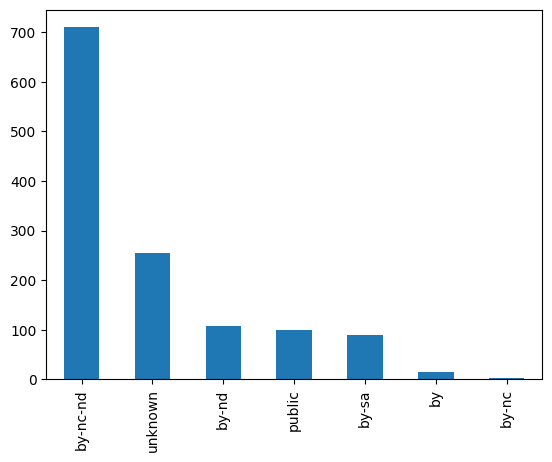

In [7]:
# Plot results
fig, ax = plt.subplots()
licenses_df['Licence Type'].value_counts(dropna=False).plot(ax=ax, kind='bar')

In [8]:
# Show counts
licenses_df['Licence Type'].value_counts()

by-nc-nd    710
unknown     255
by-nd       107
public      100
by-sa        89
by           14
by-nc         2
Name: Licence Type, dtype: int64

In [9]:
# Total translations in the clear
licenses_df['Licence Type'].value_counts().sum() - \
licenses_df[licenses_df['Licence Type'].str.contains('unknown')].shape[0]

1022

In [10]:
# Investigate unknowns
# pd.set_option('display.max_rows', 30)
licenses_df[licenses_df['Licence Type'].str.contains("unknown") | licenses_df['Licence Type'].isna()]['Copyright Holder'].value_counts(dropna=False)

Wycliffe Bible Translators, Inc.                                   224
World Bible Translation Center                                      11
Ahle Kitab Society                                                   3
United Bible Societies                                               2
NaN                                                                  2
The Worldwide Bible Society Limited                                  2
Biblical Studies Press, L. L. C.                                     1
Wycliffe Bible Translators, Inc. and BFP Velberter Mission           1
Wycliffe Bible Translators, Inc. and The Bible Society of India      1
Society of Biblical Literature and Logos Bible Software              1
Bible Translation and Literacy                                       1
God’s Word to the Nations Mission Society, Inc.                      1
Bible League International                                           1
The Bible Society of Papua New Guinea                                1
J Warr

In [11]:
# Examples
# https://ebible.org/Bible/details.php?id=apyNT
# https://ebible.org/Bible/details.php?id=abp
# https://ebible.org/Bible/details.php?id=csy
# https://ebible.org/Bible/details.php?id=acd
# https://ebible.org/Bible/details.php?id=arq
# https://ebible.org/Bible/details.php?id=syll
# https://ebible.org/Bible/details.php?id=ukr1996

In [12]:
licenses_df[licenses_df['Licence Type'].str.contains("unknown") & (licenses_df['Copyright Holder'].str.contains("Wycliffe") == False)]

,ID,Language,Dialect,Licence Type,Licence Version,CC Licence Link,Copyright Holder,Copyright Years,Translation by
34,akh,Angal Heneng,Waola,unknown,NaN,NaN,The Bible Society of Papua New Guinea,copyright © 1978,NaN
43,amh,አማርኛ (Amharic),NaN,unknown,NaN,NaN,United Bible Societies,"copyright © 1962, 2003",NaN
72,arbwbtc,العربية (Arabic),Standard,unknown,NaN,NaN,World Bible Translation Center,copyright © 2007,Translation by: World Bible Translation Center
77,arq,"(Arabic, Algerian Spoken)",NaN,unknown,NaN,NaN,United Bible Societies,copyright © 2018,NaN
117,ben2006,বাংলা (Bengali),NaN,unknown,NaN,NaN,World Bible Translation Center,copyright © 2001-2006,Translation by: World Bible Translation Center
178,buk2013,Bugawac,NaN,unknown,NaN,NaN,Lutheran Bible Translators Australia,copyright © 2013,NaN
239,cmn-ncvs,中国语文 (Chinese),"Mandarin, simplified script",unknown,NaN,NaN,The Worldwide Bible Society Limited,"copyright © 1976, 1992, 1999, 2001, 2005, 2010",Translation by: The Worldwide Bible Society Ltd.
240,cmn-ncvt,中國語文 (Chinese),"Mandarin, traditional script",unknown,NaN,NaN,The Worldwide Bible Society Limited,"copyright © 1976, 1992, 1999, 2001, 2005, 2010",Translation by: The Worldwide Bible Society
241,cmn2006,中国语文 (Chinese),"Mandarin, simplified script",unknown,NaN,NaN,World Bible Translation Center,"copyright © 2004, 2006",Translation by: World Bible Translation Center
254,copshc,ⲘⲉⲧⲢⲉⲙ̀ⲛⲭⲏⲙⲓ (Coptic),Sahidic,unknown,NaN,NaN,J Warren Wells,copyright © 2000-2006,Translation by: J Warren Wells


In [13]:
# Check if the corpus includes any 'unknown' licensed projects
# or if any known licensed projects have been discluded
known_licensed_set = set(licenses_df[~(licenses_df['Licence Type'].str.contains('unknown'))]['ID'].apply(lambda x: f'{x[:3]}-{x}.txt' if '-' not in x else f'{x.split("-")[0]}-{x}.txt').to_list())
print(f'Number of projects with known licenses = {len(known_licensed_set)}')

current_corpus_set = set([f'{project.name}' for project in (Path(EBIBLE_REPO_DIR) / Path('corpus')).iterdir()])
print(f'Number of projects currently in the corpus = {len(current_corpus_set)}')

print(f'\nProjects with an unknown license currently included in the corpus: \n{current_corpus_set - known_licensed_set}')
print(f'\nProjects with known license currently discluded from the corpus: \n{known_licensed_set - current_corpus_set}')

Number of projects with known licenses = 1022
Number of projects currently in the corpus = 1028

Projects with an unknown license currently included in the corpus: 
{'eng-engnet.txt', 'kxw-kxw.txt', 'big-big2013.txt', 'fad-fad.txt', 'nuq-nuq.txt', 'ino-ino2013.txt', 'cop-copshc.txt', 'kud-kud2014.txt', 'grc-grcsbl.txt', 'amh-amh.txt', 'bbr-bbr2013.txt', 'ukr-ukr1996.txt'}

Projects with known license currently discluded from the corpus: 
{'cme-cmeNT.txt', 'cot-cotNT.txt', 'urd-urd.txt', 'bzj-bzj.txt', 'alh-alh.txt', 'kld-kld.txt'}


### Conclusion

After manual inspection the following steps were taken:
1. Removed from current corpus:
`kxw-kxw.txt`
`big-big2013.txt`
`fad-fad.txt`
`nuq-nuq.txt`
`ino-ino2013.txt`
`kud-kud2014.txt`
`bbr-bbr2013.txt`

2. Added into corpus:
`cme-cmeNT.txt`
`cot-cotNT.txt`
`urd-urd.txt`
`bzj-bzj.txt`

In [21]:
# Testing
# licenses_df[licenses_df['ID'].str.contains("kud2014")]